In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"]=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("data/train.csv", parse_dates=["datetime"])
test=pd.read_csv("data/test.csv",parse_dates=["datetime"])
train.shape,test.shape

((10886, 12), (6493, 9))

In [3]:
train["year"] = train["datetime"].dt.year
train["month"]= train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

In [4]:
test["year"] = test["datetime"].dt.year
test["month"]= test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek

In [5]:
train.shape,test.shape

((10886, 19), (6493, 16))

(10886, 19)

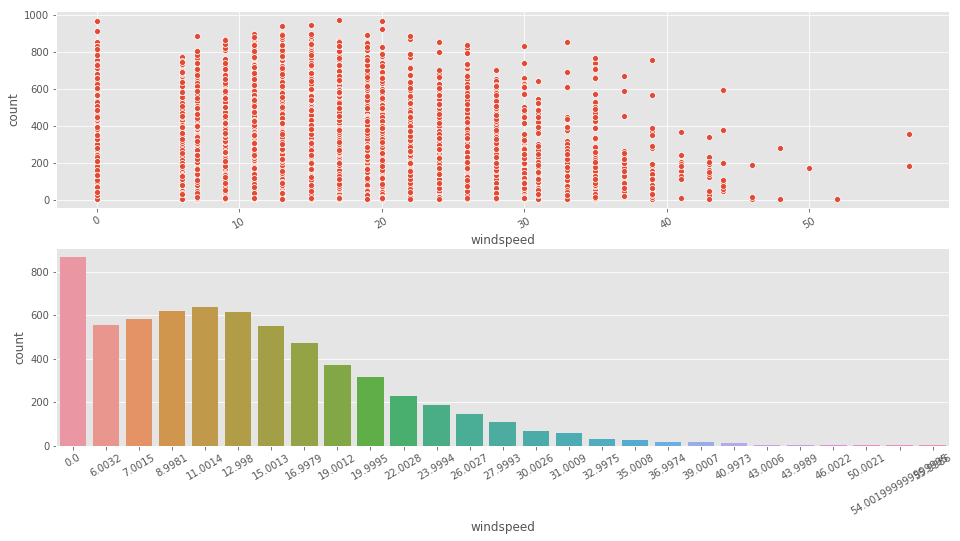

In [6]:
fig,ax=plt.subplots(2,1,figsize=(16,8))
plt.sca(ax[0])
plt.xticks(rotation=30)
sns.scatterplot(data=train,x="windspeed",y="count",ax=ax[0])
plt.sca(ax[1])
plt.xticks(rotation=30)
sns.countplot(data=test,x="windspeed",ax=ax[1])
train.shape


In [7]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = train[train["windspeed"]==0]
dataWindNot0 = train[train["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
train = dataWindNot0.append(dataWind0)
train.reset_index(inplace=True)
train.drop('index',inplace=True,axis=1)

(10886, 19)

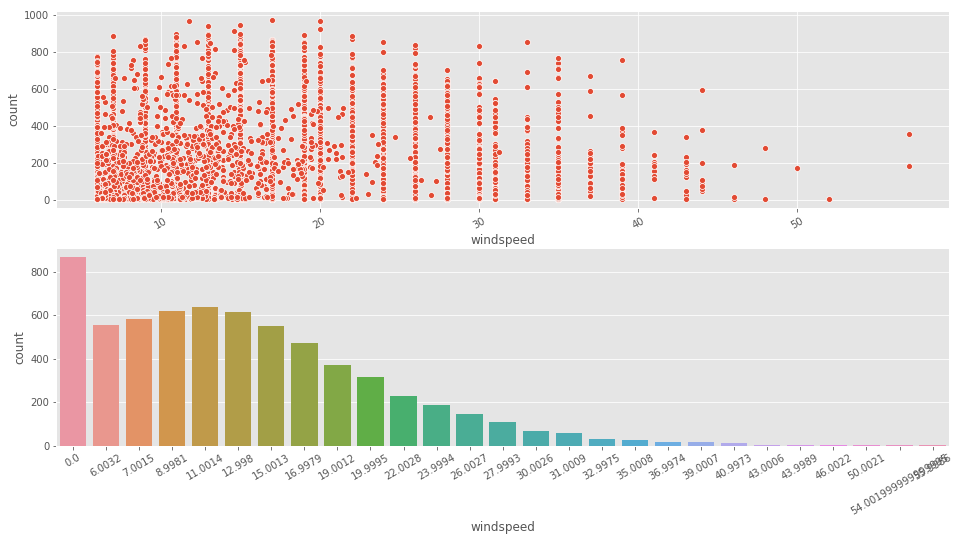

In [8]:
fig,ax=plt.subplots(2,1,figsize=(16,8))
plt.sca(ax[0])
plt.xticks(rotation=30)
sns.scatterplot(data=train,x="windspeed",y="count",ax=ax[0])
plt.sca(ax[1])
plt.xticks(rotation=30)
sns.countplot(data=test,x="windspeed",ax=ax[1])
train.shape

In [9]:
categorical_feature=["season","holiday","workingday","weather","dayofweek","month","year","hour"]
for var in categorical_feature:
    train[var]=train[var].astype("category")
    test[var]=test[var].astype("category")

In [11]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [19]:
selected_feature=["season","workingday","weather","temp","atemp","humidity","windspeed","year","month","hour"]

In [20]:
x_train=train[selected_feature]
x_test=test[selected_feature]
label_name="count"
y_train=train[label_name]

## Score

In [21]:
#rmse
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## RandomForest

In [23]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
model.fit(x_train,y_train)
predictions=model.predict(x_test)
predictions

array([  8.61,   5.66,   5.24, ..., 149.01, 121.31,  66.45])

## Submit

In [26]:
submission=pd.read_csv("data/sampleSubmission.csv")

In [30]:
submission["count"]=predictions

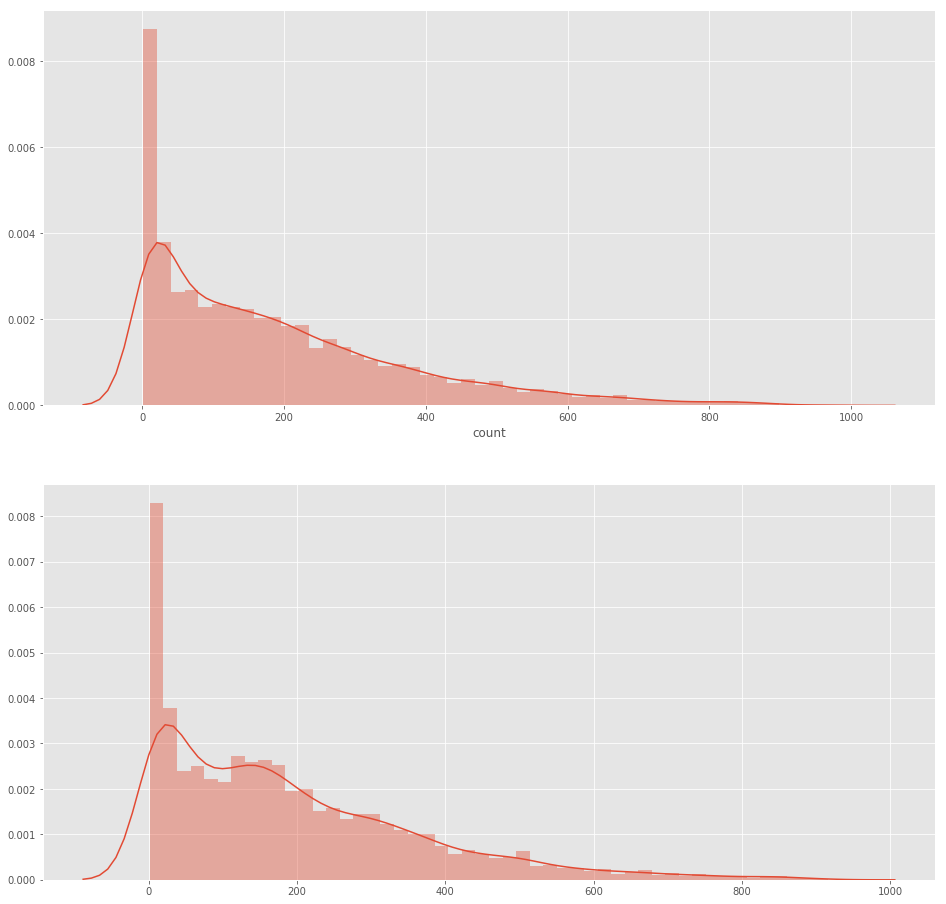

In [32]:
f,ax=plt.subplots(2,1,figsize=(16,16))
sns.distplot(y_train,ax=ax[0],bins=50)
sns.distplot(predictions,ax=ax[1],bins=50)

In [38]:
submission=pd.read_csv("data/sampleSubmission.csv")
submission["count"]=predictions
from datetime import datetime
now = datetime.now()
submission.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [39]:
1255/3245


0.386748844375963